#  
#  
#  
#  
#  
# Dagstuhl 11/08/2016
## SageMath for Coding Theory teaching and research (in the time of Big Data)

#  
#  
#  
#  
#  
#  
#  
#  
#  
#  



### SageMath is a powerful Open-Source computer-algebra system
    - Embeds many other projects: GAP, Singular, Macaulay2, NTL, FLINT, ...
    - Rapid prototyping, uses a real programming language (Python)
    - Powerful for experimentation using worksheets
    - Open-Source: Don't like it: fix it!
    - SageMathCloud brilliant for class-room. No installation, great interface.
    - ...
    
### SageMath has matured a lot the last years
    - If you tried it 5 years ago -- perhaps time to revisit it?
    
    
    
    
### ACTIS: Algorithmic Coding Theory in Sage
    - 2014-2016: one full-time engineer for improving CT in SageMath
    - People: David Lucas (engineer), Daniel Augot, Clément Pernet, myself
    
#   

#  

#  
#  
#  


### Basic stuff (you might have seen all this before)

In [51]:
%display latex

In [52]:
G = matrix(GF(2),  [ [ 1, 0, 0, 1, 1 ],
                     [ 0, 1, 0, 1, 0 ],
                     [ 0, 0, 1, 0, 1 ] ])
C = LinearCode(G)
print C

Linear code of length 5, dimension 3 over Finite Field of size 2


In [53]:
C.minimum_distance()

2

In [54]:
C.random_element()

(1, 0, 1, 1, 0)

In [55]:
C.automorphism_group_gens()

([((1, 1, 1, 1, 1); (), Ring endomorphism of Finite Field of size 2
    Defn: 1 |--> 1),
  ((1, 1, 1, 1, 1); (), Ring endomorphism of Finite Field of size 2
    Defn: 1 |--> 1),
  ((1, 1, 1, 1, 1); (2,3)(4,5), Ring endomorphism of Finite Field of size 2
    Defn: 1 |--> 1),
  ((1, 1, 1, 1, 1); (2,4), Ring endomorphism of Finite Field of size 2
    Defn: 1 |--> 1),
  ((1, 1, 1, 1, 1); (3,5), Ring endomorphism of Finite Field of size 2
    Defn: 1 |--> 1)],
 8)

In [56]:
m = vector(GF(2), [0,0,1])
c = C.encode(m)
c

(0, 0, 1, 0, 1)

In [60]:
r = c + vector(GF(2), [1,0,0,0,0])
r

(1, 0, 1, 0, 1)

In [61]:
C.decode_to_code(r)

(0, 0, 1, 0, 1)

In [62]:
C.decode_to_message(r)

(0, 0, 1)


#  

#  

#  

#  

# Some codes have structure

In [63]:
F = GF(59)
C = codes.GeneralizedReedSolomonCode(F.list(), 16)
print C

[59, 16, 44] Generalized Reed-Solomon Code over Finite Field of size 59


In [64]:
C.minimum_distance()

44

In [65]:
C.weight_enumerator()

7863486030543333673826577152*x^59 + 7999063375898830502902284856*x^58 + 3999531687939483355061080628*x^57 + 1310191415061834848303837204*x^56 + 316253100031228092883970512*x^55 + 59979036594424651251242464*x^54 + 9307091172531426256620792*x^53 + 1214966141686536287568696*x^52 + 136158808124233130392728*x^51 + 13303951456614403046748*x^50 + 1146121368021180420870*x^49 + 88454301571049513190*x^48 + 5917613161578583920*x^47 + 426302056363431360*x^46 + 11569714399416600*x^45 + 2313942879883320*x^44 + 1

In [66]:
c = C.random_element()
Ch = channels.StaticErrorRateChannel(F^C.length(), 13)

r = Ch.transmit(c)
r-c

(0, 0, 0, 0, 0, 0, 0, 13, 1, 48, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 49, 0, 0, 0, 0, 0, 13, 2, 0, 53, 0, 0, 0, 0, 0, 0, 0, 14, 28, 0, 0, 0, 40, 52, 0, 0, 41, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [67]:
c_out = C.decode_to_code(r)
c == c_out

True

#   

#  

#  
#  
### We have list-decoding as well

In [68]:
radius, params = \
    codes.decoders.GRSGuruswamiSudanDecoder.guruswami_sudan_decoding_radius(C, s=3)
print "Decoding radius: %s,  (s,ell) = %s" % (radius, params)

Decoding radius: 27,  (s,ell) = (3, 6)


In [69]:
D = C.decoder("GuruswamiSudan", parameters = params)

Ch_evil = channels.StaticErrorRateChannel(C.ambient_space(), radius)
r = Ch_evil.transmit(c)

In [70]:
lst = D.decode_to_code(r)
print "Nearby codewords: %s" % lst

Nearby codewords: [(11, 14, 31, 33, 10, 10, 31, 37, 36, 36, 8, 5, 22, 29, 27, 4, 51, 42, 11, 57, 5, 55, 1, 4, 10, 42, 38, 53, 19, 47, 27, 41, 20, 13, 11, 39, 37, 2, 30, 8, 40, 52, 41, 1, 53, 45, 5, 45, 41, 48, 16, 8, 18, 28, 47, 53, 22, 30, 52)]



#  

#  

#  

#  

### Cyclic codes

In [71]:
P.<x> = GF(2)[]
g = (x + 1)*(x^4 + x + 1)
C = codes.CyclicCode(generator_pol = g, length = 15)
print C

[15, 10] Cyclic Code over Finite Field of size 2 with x^5 + x^4 + x^2 + 1 as generator polynomial


In [72]:
C.parity_check_matrix()

[1 1 1 0 1 1 0 0 1 0 1 0 0 0 0]
[0 1 1 1 0 1 1 0 0 1 0 1 0 0 0]
[0 0 1 1 1 0 1 1 0 0 1 0 1 0 0]
[0 0 0 1 1 1 0 1 1 0 0 1 0 1 0]
[0 0 0 0 1 1 1 0 1 1 0 0 1 0 1]

In [73]:
C.bch_bound()

4

In [74]:
C.minimum_distance()

4

In [75]:
C_bch = C.surrounding_bch_code()
print C_bch

[15, 10] BCH Code over Finite Field of size 2 with x^5 + x^4 + x^2 + 1 as generator polynomial


In [76]:
C_grs = C_bch.bch_to_grs()
print C_grs

[15, 12, 4] Generalized Reed-Solomon Code over Finite Field in z4 of size 2^4


In [77]:
D = codes.decoders.GRSGuruswamiSudanDecoder(C_grs, tau=2)

c = C.random_element()
Ch = channels.StaticErrorRateChannel(C_bch.ambient_space(), 2)
r = Ch.transmit(c)

D.decode_to_code(r)

[(1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0),
 (0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0),
 (1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0),
 (1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0),
 (1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0),
 (1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0),
 (1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0)]


#  

#  

#  

#  

### Reed-Muller codes

In [78]:
C = codes.ReedMullerCode(GF(3), 2, 4)
print C

Reed-Muller Code of order 2 and 4 variables over Finite Field of size 3


In [79]:
C.dimension(), C.length(), C.minimum_distance()

(15, 81, 27)


#  
#  
### A Reed-Muller code of low order lies inside a Reed-Solomon code

In [80]:
print C.reed_solomon_supercode()

[81, 55, 27] Generalized Reed-Solomon Code over Finite Field in y of size 3^4


In [81]:
c = C.random_element()
Ch = channels.ErrorErasureChannel(C.ambient_space(), 3, 20)
r = Ch.transmit(c)
print r[0]
print r[1]

(2, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2)
(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0)


In [82]:
D = C.reed_solomon_supercode().decoder("ErrorErasure")

D.decode_to_code(r)

(2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2)


#  

#  

#  

#  

### Benchmarking

Ex: Comparing decoding speeds of algorithms across number of errors

In [83]:
eval_pts = GF(59).list()[1:]  #don't use 0 as eval point
C = codes.GeneralizedReedSolomonCode(eval_pts, 30)
C.decoders_available()

['Syndrome',
 'NearestNeighbor',
 'ErrorErasure',
 'Gao',
 'GuruswamiSudan',
 'KeyEquationSyndrome',
 'BerlekampWelch']

In [84]:
D_key = C.decoder("KeyEquationSyndrome")
D_gao = C.decoder("Gao")

In [85]:
V = C.ambient_space()

max_radius = 14
B_key = codes.Benchmark()
B_gao = codes.Benchmark()
for t in range(0, max_radius+1):
    Ch = channels.StaticErrorRateChannel(V, t)
    B_key += codes.Benchmark(C, D_key, Ch, identifier=t)
    B_gao += codes.Benchmark(C, D_gao, Ch, identifier=t)

In [86]:
B_key.run(verbosity_level=1)
B_gao.run(verbosity_level=1)

Starting run for benchmark 0
25 percent complete
50 percent complete
75 percent complete
Run complete for benchmark 0
Starting run for benchmark 1
25 percent complete
50 percent complete
75 percent complete
Run complete for benchmark 1
Starting run for benchmark 2
25 percent complete
50 percent complete
75 percent complete
Run complete for benchmark 2
Starting run for benchmark 3
25 percent complete
50 percent complete
75 percent complete
Run complete for benchmark 3
Starting run for benchmark 4
25 percent complete
50 percent complete
75 percent complete
Run complete for benchmark 4
Starting run for benchmark 5
25 percent complete
50 percent complete
75 percent complete
Run complete for benchmark 5
Starting run for benchmark 6
25 percent complete
50 percent complete
75 percent complete
Run complete for benchmark 6
Starting run for benchmark 7
25 percent complete
50 percent complete
75 percent complete
Run complete for benchmark 7
Starting run for benchmark 8
25 percent complete
50 perc

### Let's plot it!

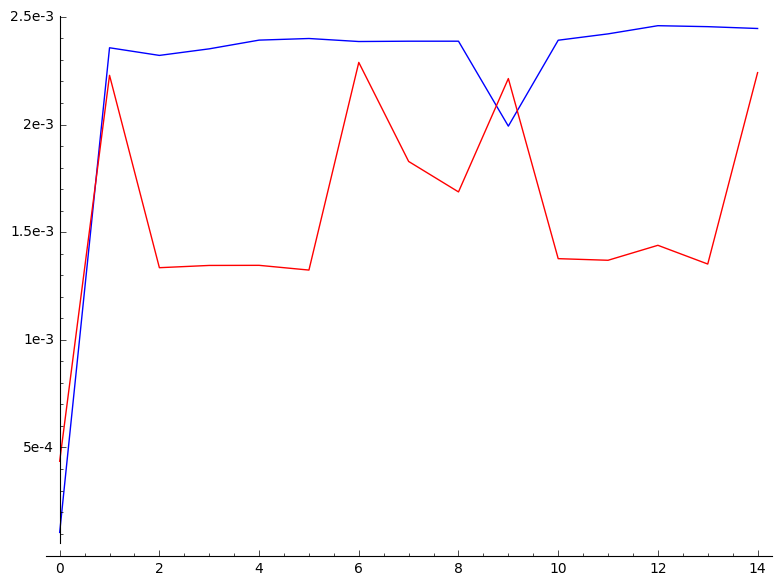

In [87]:
g = Graphics()
g += B_key.plot(lambda t: \
                (t, B_key.compute_timings("decoding", median, t)), color="blue")

g += B_gao.plot(lambda t: \
                (t, B_gao.compute_timings("decoding", median, t)), color="red")
g


#  

#  

#  

#  

## Other features in Sage:

See roadmap: https://bitbucket.org/lucasdavid/sage_coding_project

#  

#  

#  

#  

#  

#  

#  

## The future

ACTIS ends in 1 month :-(

David Lucas will go do a PhD in something related to - but not really - coding theory.

### Feedback
* Does it work?
* Is it convenient?
* Does it support your research and your teaching?
* What is missing?
    
### Reviewing the implemented-but-not-in-Sage features
* Good math-skills are more important than good programming skills!
    
### Developing new features?
* What do you need?
* Contact me if you're interested in helping out!

### SageDays 22nd--26th August in (outskirts of) Paris on Coding Theory
* For beginners and experiences users/programmers alike!
* It will be awesome! Please join.
* Suggest a project for the week!
* https://wiki.sagemath.org/days75